In [ ]:
import numpy as np
import random

In [ ]:
# let us consider a candidate soln as a K-ary encoding where each index represents an item and each element represents the
# coordinates of the centroid or the center of the component

# example [(1,2),(3,4),(5,6),(7,8),(10,11)] this is one candidate soln

In [ ]:
# given layout domain is x = [-40,40] and y= [-25,25]
# all coordinates will be within this domain

In [ ]:
[1,2,3,4,6,7,]

In [ ]:
import sys
sys.path.insert(1,'C:/Users/hp/Desktop/python jupyter notebooks/code_python/problem_1/python_p1')
from utils import *
from Parameter import domain, component, heatpipe

In [ ]:
import random
def create_candidate_solns():
    cord_list = []
    count  = 0
    while(True):
        x = []
        dim = component.x_opt_dim
        x = np.random.rand(1, dim) * (component.x_opt_max - component.x_opt_min) + component.x_opt_min
        objectives , constraints = getObjectiveConstraint(x, domain, component, heatpipe)
        cons1,cons2,cons3,cons4 = constraints
        if(cons1 == 0 and cons2 <= 0 and cons3 <= 0 and cons4 <=30):
            #print('Iteration : {0} All Constrainst Passed'.format(count))
            return x[0]
        count = count + 1
        
def create_population_of_solutions(pop_size):
    population = []
    for i in range(pop_size):
        population.append(create_candidate_solnss())
    return population

In [ ]:
import matplotlib.pyplot as plt
def calculate_fitness(population):
    Fitness = []
    for i in population:
        objectives,constraints = getObjectiveConstraint(i, domain, component, heatpipe)
        value = objectives[0]
        Fitness.append(value)
    return Fitness

def tournament_selection(K_children,k,population):
    final_parents = []
    for i in range(K_children):
        parents = []
        for j in range(k):
            parents.append(population[np.random.randint(0,100)])
        Fitness = calculate_fitness(parents)
        index = Fitness.index(max(Fitness))
        final_parents.append(parents[index])
    return final_parents


# [1,2,3,4,5,6,..12]--->[1,] , [1,2,3,4..12]

def crossover_parents(rate,parents):
    children = []
    #print('crossover ',len(parents))
    # number of parents to crossover
    for i in range(int(len(parents)/2)):
        parent_1 = list(parents[np.random.randint(0,len(parents))])
        parent_2 = list(parents[np.random.randint(0,len(parents))])
    #print(cross_over_index)
    #print(parent_1 , type(parent_1))
    #print(parent_2 , type(parent_2))
        for i in range(rate):
            cross_over_index = np.random.randint(0,6)
            index_x = [0,2,4,6,8,10]
            index_y = [1,3,5,7,9,11]
            #random.shuffle(index_x)
            #random.shuffle(index_y)
            #print(parent_1)
            parent_1_x = [parent_1[i] for i in index_x]
            parent_1_y = [parent_1[i] for i in index_y]
            parent_2_x = [parent_2[i] for i in index_x]
            parent_2_y = [parent_2[i] for i in index_y]
            child_1_x = parent_1_x[0:cross_over_index] + parent_2_x[cross_over_index:]
            child_1_y = parent_1_y[0:cross_over_index] + parent_2_y[cross_over_index:]
            child_2_x = parent_2_x[0:cross_over_index] + parent_1_x[cross_over_index:]
            child_2_y = parent_2_y[0:cross_over_index] + parent_1_y[cross_over_index:]
            #index_x.sort()
            #index_y.sort()
            #print(child_1_x)
            #child_1_x = [child_1_x[int(i/2)] for i in index_x]
            #child_1_y = [child_1_y[int(i/2)] for i in index_y]
            #child_2_x = [child_2_x[int(i/2)] for i in index_x]
            #child_2_y = [child_2_y[int(i/2)] for i in index_y]
            
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(12)]
            child_2 = [child_2_x[int(i/2)] if i%2==0 else child_2_y[int(i/2)] for i in range(12)]
            parent_1 = child_1
            parent_2 = child_2
        children.append(np.array(child_1))
        children.append(np.array(child_2))
    return children

# [1,12,....12] -->[1,2,3,4],[1,23,3...]

def mutation_2(rate,children):
    #print('mutation_2 ',len(children))
    #print(children)
    mutated_childen = []
    index_x = [0,2,4,6,8,10]
    index_y = [1,3,5,7,9,11]
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            ele_1 = np.random.randint(0,6)
            # rotation
            child_1_x[ele_1] = -child_1_y[ele_1]
            child_1_y[ele_1] =  child_1_x[ele_1]
        
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(12)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen

def mutation_3(rate,children):
    #print('mutation_3 ',len(children))
    mutated_childen = []
    index_x = [0,2,4,6,8,10]
    index_y = [1,3,5,7,9,11]
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            ele_1 = np.random.uniform(0,10)
            ele_2 = np.random.randint(0,6)
            # rotation
            child_1_x[ele_2] = child_1_x[ele_2] + ele_1
            child_1_y[ele_2] = child_1_y[ele_2] + ele_1
            
        
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(12)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen


def mutation(rate,children):
    # considering swap mutation
    #print('mutation ',len(children))
    mutated_childen = []
    index_x = [0,2,4,6,8,10]
    index_y = [1,3,5,7,9,11]
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            swap_ele_1 = np.random.randint(0,6)
            swap_ele_2 = np.random.randint(0,6)
        
            child_1_x[swap_ele_1] , child_1_x[swap_ele_2] = child_1_x[swap_ele_2] , child_1_x[swap_ele_1]
            child_1_x[swap_ele_1] , child_1_x[swap_ele_2] = child_1_y[swap_ele_1] , child_1_y[swap_ele_2]
            child_1_y[swap_ele_1] , child_1_y[swap_ele_2] = child_1_y[swap_ele_2] , child_1_y[swap_ele_1]
            child_1_y[swap_ele_1] , child_1_y[swap_ele_2] = child_1_x[swap_ele_1] , child_1_x[swap_ele_2]
        
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(12)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen
        
def check():
    population = create_population_of_solutions(100)
    count = 0
    valid_count = 0
    Archive = []
    while(count<1000):
        #print("Iteration number {0}".format(count))
        children_fitness=[]
        parents = tournament_selection(30,10,population)
        crossover_children  = crossover_parents(1,parents)
        children = mutation(2,crossover_children)
        children_2 = mutation_2(1,children)
        children = mutation_3(1,children_2)
        fitness_population = calculate_fitness(population)
        print("Best Fitness in Iteration {0} is {1}".format(count,min(calculate_fitness(population))))
        fitness_printing=[]
        for i in children:
            objectives , constraints = getObjectiveConstraint(i, domain, component, heatpipe)
            cons1,cons2,cons3,cons4 = constraints
            if(cons1 == 0 and cons2 <= 0 and cons3 <= 0 and cons4 <=30):
                valid_count = count + 1
                fitness = calculate_fitness([i])
                print('child fitness',fitness)
                fitness_printing.append(fitness[0])
            else:
                fitness = np.inf
            children_fitness.append(fitness)
        #print('Best Fitness of Children is {0}'.format(max(children_fitness)))
        # Replacement Strategy : weakest replacement
        weakest_fitness = max(fitness_population)
        weakest_fitness_index = fitness_population.index(weakest_fitness)
        for i in range(len(children)):
            if(children_fitness[i]<=weakest_fitness):
                population.pop(weakest_fitness_index)
                population.append(children[i])
        Archive.append(max(calculate_fitness(population)))
        count = count +1
    #plt.scatter(list(range(1000)),Archive)
    #plt.xlabel('Generations')
    #plt.ylabel('Best Fitness in Generations')
        
    print("Number of valid children is {0}".format(valid_count))
    
    
    

In [ ]:
check()

#### Lets Try PSO

In [ ]:
def create_random_solution():
    while(True):
        x = []
        for i in range(12):
            x.append(random.uniform(component.x_opt_min[0][i],component.x_opt_max[0][i]))
        x = np.array(x)
        objectives , constraints = getObjectiveConstraint(x, domain, component, heatpipe)
        cons1,cons2,cons3,cons4 = constraints
        if(cons1 == 0 and cons2 <= 0 and cons3 <= 0 and cons4 <=30):
            #print('Iteration : {0} All Constrainst Passed with Cords = {1}'.format(count,x))
            return x
        count = count + 1
        
def create_particle():
    particle = {}
    particle['position']  = create_population_of_solutions(1)[0]
    particle['cost'] = calculate_fitness([particle['position']])[0]
    particle['bpos'] = particle['position']
    particle['bcost'] = particle['cost']
    particle['velocity'] = [np.random.randint(-10,10) for i in range(12)]
    return particle

def get_global_best(population, current_best=0):
    sorted_pop = sorted(population, key=lambda i: i['cost'])
    best = sorted_pop[len(population)-1]
    value = best['cost']
    #print(value)
    if (float(value) <= current_best or current_best == 0):
        current_best_dict = {}
        current_best_dict['position'] = best['position']
        current_best_dict['cost'] = best['cost']
    return current_best_dict

def update_velocity(particle,gbest,vmax,c1,c2):
    v1 = c1 * np.random.uniform(0,1)*np.subtract(particle['bpos'],particle['position'])
    v2 = c2 * np.random.uniform(0,1)*np.subtract(gbest['position'],particle['position'])
    #print(v1,v2)
    updated_vel = np.array(v1) + np.array(v2)
    particle['velocity'] = np.array(particle['velocity'])+np.array(updated_vel)
    return particle

def update_position(particle):
    particle['position'] = np.array(particle['position'])+np.array(particle['velocity'])
    objectives , constraints = getObjectiveConstraint(particle['position'], domain, component, heatpipe)
    cons1,cons2,cons3,cons4 = constraints
    if(cons1 == 0 and cons2 <= 0 and cons3 <= 0 and cons4 <=30):
        particle['position'] = particle['position']
    else:
        particle['position'] = particle['bpos']

def update_best_position(particle):
    if(particle['cost'] > particle['bcost']):
        particle['bpos'] = particle['position']

def begin_search(pop_size):
    particles = []
    for i in range(pop_size):
        particles.append(create_particle())
    gbest = get_global_best(particles,0)
    iterations = 0
    while(iterations<=1000):
        for i in particles:
            update_velocity(i,gbest,0,2,2)
            update_position(i)
            update_best_position(i)
        gbest = get_global_best(particles,gbest['cost'])
        print('Best Fitness in each Generation = {0}'.format(gbest['cost']))
    
    
    
    
        
    

In [ ]:
begin_search(100)

In [ ]:
import random
x=[1,2,3,4]
random.shuffle(x)

In [ ]:
x.sort()

In [ ]:
x

In [14]:
import numpy as np
import random
from pymoo.operators.crossover.sbx import SBX
from pymoo.core.problem import Problem
from pymoo.core.individual import Individual
from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.pm import PolynomialMutation



# let us consider a candidate soln as a K-ary encoding where each index represents an item and each element represents the
# coordinates of the centroid or the center of the component

# example [(1,2),(3,4),(5,6),(7,8),(10,11)] this is one candidate soln

# given layout domain is x = [-40,40] and y= [-25,25]
# all coordinates will be within this domain
import sys
sys.path.insert(1,'C:/Users/hp/Desktop/python jupyter notebooks/code_python/problem_2/python_p2')
import math
from utils import getObjectiveConstraint, plot_layout, prepare_data
json_file = "C:/Users/hp/Desktop/python jupyter notebooks/code_python/problem_2/python_p2/Problem2.json"
domain, component, heatpipe = prepare_data(json_file)


import random
def create_candidate_solns():
    cord_list = []
    count  = 0
    x = []
    x_dim = component.x_opt_dim  # x_dim: dimension of design variables
    x_max, x_min = component.x_opt_max, component.x_opt_min  # ranges of design variables [size: 1*x_dim]
    x = x_min + np.random.rand(x_min.shape[0], x_min.shape[1]) * (x_max - x_min)  # randomly generate one layout
    return x[0]
    
        
def create_population_of_solutions(pop_size):
    population = []
    for i in range(pop_size):
        population.append(create_candidate_solns())
    return population

import matplotlib.pyplot as plt
def calculate_fitness(population):
    Fitness = []
    for i in population:
        objectives,constraints = getObjectiveConstraint(i, domain, component, heatpipe)
        cons1,cons2,cons3,cons4 = constraints
        if(cons1<=0 and cons2<=0 and cons3<=0 and cons4<=60):
            value = objectives[0]
            values = -value if value!=0 else 0
        else:
            values = -(objectives[0]+cons1)
        Fitness.append(values)
    return Fitness

def tournament_selection(K_children,k,population):
    final_parents = []
    for i in range(K_children):
        parents = []
        for j in range(k):
            parents.append(population[np.random.randint(0,100)])
        Fitness = calculate_fitness(parents)
        index = Fitness.index(max(Fitness))
        final_parents.append(parents[index])
    return final_parents


# [1,2,3,4,5,6,..12]--->[1,] , [1,2,3,4..12]

def crossover_parents(rate,parents):
    children = []
    #print('crossover ',len(parents))
    # number of parents to crossover
    for i in range(int(len(parents)/2)):
        parent_1 = list(parents[np.random.randint(0,len(parents))])
        parent_2 = list(parents[np.random.randint(0,len(parents))])
    #print(cross_over_index)
    #print(parent_1 , type(parent_1))
    #print(parent_2 , type(parent_2))
        for i in range(rate):
            cross_over_index = np.random.randint(0,15)
            index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
            index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
            #random.shuffle(index_x)
            #random.shuffle(index_y)
            #print(parent_1)
            parent_1_x = [parent_1[i] for i in index_x]
            parent_1_y = [parent_1[i] for i in index_y]
            parent_2_x = [parent_2[i] for i in index_x]
            parent_2_y = [parent_2[i] for i in index_y]
            
            #index_x.sort()
            #index_y.sort()
            #print(child_1_x)
            #child_1_x = [child_1_x[int(i/2)] for i in index_x]
            #child_1_y = [child_1_y[int(i/2)] for i in index_y]
            #child_2_x = [child_2_x[int(i/2)] for i in index_x]
            #child_2_y = [child_2_y[int(i/2)] for i in index_y]
            problem_1 = Problem(n_var=15, xl=100.0, xu=900.0)
            problem_2 = Problem(n_var=15, xl=25.0, xu=475.0)
            parent_1_x = Individual(X=np.array(parent_1_x))
            parent_2_x = Individual(X=np.array(parent_2_x))

            parents_x = [[parent_1_x,parent_2_x]]
            off = SBX(prob=0.9, prob_var=0.9, eta=15).do(problem_1, parents_x)
            childs_1_x = off.get("X")
            child_1_x = childs_1_x[0]
            child_2_x = childs_1_x[1]

            parent_1_y = Individual(X=np.array(parent_1_y))
            parent_2_y = Individual(X=np.array(parent_2_y))

            parents_y = [[parent_1_y,parent_2_y]]
            off = SBX(prob=0.9, prob_var=0.9, eta=15).do(problem_2, parents_y)
            childs_1_y = off.get("X")
            child_1_y = childs_1_y[0]
            child_2_y = childs_1_y[1]



            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
            child_2 = [child_2_x[int(i/2)] if i%2==0 else child_2_y[int(i/2)] for i in range(30)]
            parent_1 = child_1
            parent_2 = child_2
        children.append(np.array(child_1))
        children.append(np.array(child_2))
    return children

# [1,12,....12] -->[1,2,3,4],[1,23,3...]

def mutation_2(rate,children):
    #print('mutation_2 ',len(children))
    #print(children)
    mutated_childen = []
    index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
    index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            ele_1 = np.random.randint(0,15)
            # rotation
            angles = [90,90,90,90,90,90,90,90,90]
            angle_choice  = np.random.randint(0,9)
            # rotation
            child_1_x[ele_1] =  child_1_x[ele_1]*math.cos(angles[angle_choice]) + child_1_y[ele_1]*math.sin(angles[angle_choice])
            child_1_y[ele_1] =  child_1_x[ele_1]*math.sin(angles[angle_choice]) + child_1_y[ele_1]*math.cos(angles[angle_choice])
            
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen

def mutation_3(rate,children):
    #print('mutation_3 ',len(children))
    mutated_childen = []
    index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
    index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]        
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            ele = np.random.randint(0,15)
            ele_1 = np.random.uniform(-20,20)
            ele_2 = np.random.randint(-20,20)
            # rotation
            child_1_x[ele] = child_1_x[ele] + ele_1
            child_1_y[ele] = child_1_y[ele] + ele_2
            
        
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen

def PM(children):
    children_x = []
    children_y = []
    for j in range(len(children)):
        index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
        index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
        child_1 = list(children[j])
        children_x.append([child_1[i] for i in index_x])
        children_y.append([child_1[i] for i in index_y])
    X = np.array(children_x)
    Y = np.array(children_y)
    pop = Population.new(X=X)
    pop_2 = Population.new(X=Y)
    problem_x = Problem(n_var=15, xl=100.0, xu=900.0)
    problem_y = Problem(n_var=15, xl=100.0, xu=900.0)
    mutation = PolynomialMutation(prob=0.85, eta=20)
    off_x = mutation(problem_x, pop)
    off_y = mutation(problem_y,pop_2)
    child_x = off_x.get("X")
    child_y = off_y.get("X")
    mutated_children = []
    for i in range(len(child_x)):
        child_x_i = child_x[i]
        child_y_i = child_y[i]
        child_1 = [child_x_i[int(i/2)] if i%2 ==0 else child_y_i[int(i/2)] for i in range(30)]
        mutated_children.append(np.array(child_1))
    return mutated_children

            


def mutation(rate,children):
    # considering swap mutation
    #print('mutation ',len(children))
    mutated_childen = []
    index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
    index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            swap_ele_1 = np.random.randint(0,15)
            swap_ele_2 = np.random.randint(0,15)
        
            child_1_x[swap_ele_1] , child_1_x[swap_ele_2] = child_1_x[swap_ele_2] , child_1_x[swap_ele_1]
            child_1_x[swap_ele_1] , child_1_x[swap_ele_2] = child_1_y[swap_ele_1] , child_1_y[swap_ele_2]
            child_1_y[swap_ele_1] , child_1_y[swap_ele_2] = child_1_y[swap_ele_2] , child_1_y[swap_ele_1]
            child_1_y[swap_ele_1] , child_1_y[swap_ele_2] = child_1_x[swap_ele_1] , child_1_x[swap_ele_2]
        
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen
        
def check():
    population = create_population_of_solutions(100)
    count = 0
    valid_count = 0
    Archive = []
    while(count<1500):
        #print("Iteration number {0}".format(count))
        children_fitness=[]
        parents = tournament_selection(30,10,population)
        crossover_children  = crossover_parents(3,parents)
        #print(crossover_children)
        children_mutation = PM(crossover_children)
        children = mutation(2,children_mutation)
        
        fitness_population = calculate_fitness(population)
        print("Best Fitness in Iteration {0} is {1}".format(count,max(calculate_fitness(population))))
        fitness_printing=[]
        for i in children:
            objectives , constraints = getObjectiveConstraint(i, domain, component, heatpipe)
            cons1,cons2,cons3,cons4 = constraints
            #print(constraints)
            if(cons1 == 0 and cons2 <= 0 and cons3 <= 0 and cons4 <=60):
                valid_count = count + 1
                fitness = calculate_fitness([i])
                print('child fitness',fitness)
            else:
                fitness = [-(objectives[0] + cons1)]
            children_fitness.append(fitness[0])
        #print('Best Fitness of Children is {0}'.format(max(children_fitness)))
        # Replacement Strategy : weakest replacement
        weakest_fitness = min(fitness_population)
        weakest_fitness_index = fitness_population.index(weakest_fitness)
        #print('Weakest fitness is {0} and child fitness is {1}'.format(weakest_fitness,children_fitness))
        for i in range(len(children)):
            if(children_fitness[i]>weakest_fitness):
                #print('Replacing {0} with {1}'.format(weakest_fitness,children_fitness[i]))
                population.pop(weakest_fitness_index)
                population.append(children[i])
        Archive.append(max(calculate_fitness(population)))
        count = count +1
    plt.scatter(list(range(1500)),Archive)
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness in Generations')
        
    print("Number of valid children is {0}".format(valid_count))

In [15]:

check()

Best Fitness in Iteration 0 is -2238.0320871292797
Best Fitness in Iteration 1 is -2238.0320871292797
Best Fitness in Iteration 2 is -1909.2262893378631
Best Fitness in Iteration 3 is -1909.2262893378631
Best Fitness in Iteration 4 is -1909.2262893378631
Best Fitness in Iteration 5 is -2385.1067178590442
Best Fitness in Iteration 6 is -2385.1067178590442
Best Fitness in Iteration 7 is -2385.1067178590442
Best Fitness in Iteration 8 is -2385.1067178590442
Best Fitness in Iteration 9 is -2385.1067178590442


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pymoo\operators\mutation\pm.py:45: RuntimeWarning: invalid value encountered in power
  d = np.power(val, mut_pow) - 1.0


Best Fitness in Iteration 10 is -2385.1067178590442
Best Fitness in Iteration 11 is -2385.1067178590442
Best Fitness in Iteration 12 is -2385.1067178590442
Best Fitness in Iteration 13 is -2385.1067178590442
Best Fitness in Iteration 14 is -2385.1067178590442
Best Fitness in Iteration 15 is -2332.2229209379284
Best Fitness in Iteration 16 is -2332.2229209379284
Best Fitness in Iteration 17 is -2332.2229209379284
Best Fitness in Iteration 18 is -2332.2229209379284
Best Fitness in Iteration 19 is -2385.1067178590442
Best Fitness in Iteration 20 is -2385.1067178590442
Best Fitness in Iteration 21 is -2385.1067178590442
Best Fitness in Iteration 22 is -2385.1067178590442
Best Fitness in Iteration 23 is -2385.1067178590442
Best Fitness in Iteration 24 is -2385.1067178590442
Best Fitness in Iteration 25 is -2385.1067178590442
Best Fitness in Iteration 26 is -2385.1067178590442
Best Fitness in Iteration 27 is -2385.1067178590442
Best Fitness in Iteration 28 is -2385.1067178590442
Best Fitness

KeyboardInterrupt: 

In [18]:
import numpy as np
import random
from pymoo.operators.crossover.sbx import SBX
from pymoo.core.problem import Problem
from pymoo.core.individual import Individual
from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.pm import PolynomialMutation



# let us consider a candidate soln as a K-ary encoding where each index represents an item and each element represents the
# coordinates of the centroid or the center of the component

# example [(1,2),(3,4),(5,6),(7,8),(10,11)] this is one candidate soln

# given layout domain is x = [-40,40] and y= [-25,25]
# all coordinates will be within this domain
import sys
sys.path.insert(1,'C:/Users/hp/Desktop/python jupyter notebooks/code_python/problem_2/python_p2')
import math
from utils import getObjectiveConstraint, plot_layout, prepare_data
json_file = "C:/Users/hp/Desktop/python jupyter notebooks/code_python/problem_2/python_p2/Problem2.json"
domain, component, heatpipe = prepare_data(json_file)


import random
def create_candidate_solns():
    cord_list = []
    count  = 0
    x = []
    x_dim = component.x_opt_dim  # x_dim: dimension of design variables
    x_max, x_min = component.x_opt_max, component.x_opt_min  # ranges of design variables [size: 1*x_dim]
    x = x_min + np.random.rand(x_min.shape[0], x_min.shape[1]) * (x_max - x_min)  # randomly generate one layout
    return x[0]
    
        
def create_population_of_solutions(pop_size):
    population = []
    for i in range(pop_size):
        population.append(create_candidate_solns())
    return population

import matplotlib.pyplot as plt
def calculate_fitness(population):
    Fitness = []
    for i in population:
        objectives,constraints = getObjectiveConstraint(i, domain, component, heatpipe)
        cons1,cons2,cons3,cons4 = constraints
        if(cons1<=0 and cons2<=0 and cons3<=0 and cons4<=60):
            value = objectives[0]
            values = -value if value!=0 else 0
        else:
            values = -(objectives[0]+cons1+cons2+cons3+cons4)
        Fitness.append(values)
    return Fitness

def tournament_selection(K_children,k,population):
    final_parents = []
    for i in range(K_children):
        parents = []
        for j in range(k):
            parents.append(population[np.random.randint(0,100)])
        Fitness = calculate_fitness(parents)
        index = Fitness.index(max(Fitness))
        final_parents.append(parents[index])
    return final_parents


# [1,2,3,4,5,6,..12]--->[1,] , [1,2,3,4..12]

def crossover_parents(rate,parents):
    children = []
    #print('crossover ',len(parents))
    # number of parents to crossover
    for i in range(int(len(parents)/2)):
        parent_1 = list(parents[np.random.randint(0,len(parents))])
        parent_2 = list(parents[np.random.randint(0,len(parents))])
    #print(cross_over_index)
    #print(parent_1 , type(parent_1))
    #print(parent_2 , type(parent_2))
        for i in range(rate):
            cross_over_index = np.random.randint(0,15)
            index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
            index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
            #random.shuffle(index_x)
            #random.shuffle(index_y)
            #print(parent_1)
            parent_1_x = [parent_1[i] for i in index_x]
            parent_1_y = [parent_1[i] for i in index_y]
            parent_2_x = [parent_2[i] for i in index_x]
            parent_2_y = [parent_2[i] for i in index_y]
            
            #index_x.sort()
            #index_y.sort()
            #print(child_1_x)
            #child_1_x = [child_1_x[int(i/2)] for i in index_x]
            #child_1_y = [child_1_y[int(i/2)] for i in index_y]
            #child_2_x = [child_2_x[int(i/2)] for i in index_x]
            #child_2_y = [child_2_y[int(i/2)] for i in index_y]
            problem_1 = Problem(n_var=15, xl=100.0, xu=900.0)
            problem_2 = Problem(n_var=15, xl=25.0, xu=475.0)
            parent_1_x = Individual(X=np.array(parent_1_x))
            parent_2_x = Individual(X=np.array(parent_2_x))

            parents_x = [[parent_1_x,parent_2_x]]
            off = SBX(prob=0.9, prob_var=0.9, eta=15).do(problem_1, parents_x)
            childs_1_x = off.get("X")
            child_1_x = childs_1_x[0]
            child_2_x = childs_1_x[1]

            parent_1_y = Individual(X=np.array(parent_1_y))
            parent_2_y = Individual(X=np.array(parent_2_y))

            parents_y = [[parent_1_y,parent_2_y]]
            off = SBX(prob=0.9, prob_var=0.9, eta=15).do(problem_2, parents_y)
            childs_1_y = off.get("X")
            child_1_y = childs_1_y[0]
            child_2_y = childs_1_y[1]



            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
            child_2 = [child_2_x[int(i/2)] if i%2==0 else child_2_y[int(i/2)] for i in range(30)]
            parent_1 = child_1
            parent_2 = child_2
        children.append(np.array(child_1))
        children.append(np.array(child_2))
    return children

# [1,12,....12] -->[1,2,3,4],[1,23,3...]

def mutation_2(rate,children):
    #print('mutation_2 ',len(children))
    #print(children)
    mutated_childen = []
    index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
    index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            ele_1 = np.random.randint(0,15)
            # rotation
            angles = [90,90,90,90,90,90,90,90,90]
            angle_choice  = np.random.randint(0,9)
            # rotation
            child_1_x[ele_1] =  child_1_x[ele_1]*math.cos(angles[angle_choice]) + child_1_y[ele_1]*math.sin(angles[angle_choice])
            child_1_y[ele_1] =  child_1_x[ele_1]*math.sin(angles[angle_choice]) + child_1_y[ele_1]*math.cos(angles[angle_choice])
            
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen

def mutation_3(rate,children):
    #print('mutation_3 ',len(children))
    mutated_childen = []
    index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
    index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]        
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            ele = np.random.randint(0,15)
            ele_1 = np.random.uniform(-20,20)
            ele_2 = np.random.randint(-20,20)
            # rotation
            child_1_x[ele] = child_1_x[ele] + ele_1
            child_1_y[ele] = child_1_y[ele] + ele_2
            
        
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen

def PM(children):
    children_x = []
    children_y = []
    for j in range(len(children)):
        index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
        index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
        child_1 = list(children[j])
        children_x.append([child_1[i] for i in index_x])
        children_y.append([child_1[i] for i in index_y])
    X = np.array(children_x)
    Y = np.array(children_y)
    pop = Population.new(X=X)
    pop_2 = Population.new(X=Y)
    problem_x = Problem(n_var=15, xl=100.0, xu=900.0)
    problem_y = Problem(n_var=15, xl=100.0, xu=900.0)
    mutation = PolynomialMutation(prob=0.85, eta=20)
    off_x = mutation(problem_x, pop)
    off_y = mutation(problem_y,pop_2)
    child_x = off_x.get("X")
    child_y = off_y.get("X")
    mutated_children = []
    for i in range(len(child_x)):
        child_x_i = child_x[i]
        child_y_i = child_y[i]
        child_1 = [child_x_i[int(i/2)] if i%2 ==0 else child_y_i[int(i/2)] for i in range(30)]
        mutated_children.append(np.array(child_1))
    return mutated_children

            


def mutation(rate,children):
    # considering swap mutation
    #print('mutation ',len(children))
    mutated_childen = []
    index_x = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
    index_y = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
    for j in range(len(children)):
        child_1 = list(children[j])
        for i in range(rate):
            child_1_x = [child_1[i] for i in index_x]
            child_1_y = [child_1[i] for i in index_y]
            swap_ele_1 = np.random.randint(0,15)
            swap_ele_2 = np.random.randint(0,15)
        
            child_1_x[swap_ele_1] , child_1_x[swap_ele_2] = child_1_x[swap_ele_2] , child_1_x[swap_ele_1]
            child_1_x[swap_ele_1] , child_1_x[swap_ele_2] = child_1_y[swap_ele_1] , child_1_y[swap_ele_2]
            child_1_y[swap_ele_1] , child_1_y[swap_ele_2] = child_1_y[swap_ele_2] , child_1_y[swap_ele_1]
            child_1_y[swap_ele_1] , child_1_y[swap_ele_2] = child_1_x[swap_ele_1] , child_1_x[swap_ele_2]
        
            child_1 = [child_1_x[int(i/2)] if i%2 ==0 else child_1_y[int(i/2)] for i in range(30)]
        mutated_childen.append(np.array(child_1))
    return mutated_childen
        
def check():
    population = create_population_of_solutions(100)
    count = 0
    valid_count = 0
    Archive = []
    while(count<1500):
        #print("Iteration number {0}".format(count))
        children_fitness=[]
        parents = tournament_selection(30,10,population)
        crossover_children  = crossover_parents(3,parents)
        #print(crossover_children)
        children_mutation = PM(crossover_children)
        children = mutation(2,children_mutation)
        
        fitness_population = calculate_fitness(population)
        print("Best Fitness in Iteration {0} is {1}".format(count,max(calculate_fitness(population))))
        fitness_printing=[]
        for i in children:
            objectives , constraints = getObjectiveConstraint(i, domain, component, heatpipe)
            cons1,cons2,cons3,cons4 = constraints
            #print(constraints)
            if(cons1 == 0 and cons2 <= 0 and cons3 <= 0 and cons4 <=60):
                valid_count = count + 1
                fitness = calculate_fitness([i])
                print('child fitness',fitness)
            else:
                fitness = [-(objectives[0] + cons1+cons2+cons3+cons4)]
            children_fitness.append(fitness[0])
        #print('Best Fitness of Children is {0}'.format(max(children_fitness)))
        # Replacement Strategy : weakest replacement
        weakest_fitness = min(fitness_population)
        weakest_fitness_index = fitness_population.index(weakest_fitness)
        #print('Weakest fitness is {0} and child fitness is {1}'.format(weakest_fitness,children_fitness))
        for i in range(len(children)):
            if(children_fitness[i]>weakest_fitness):
                #print('Replacing {0} with {1}'.format(weakest_fitness,children_fitness[i]))
                population.pop(weakest_fitness_index)
                population.append(children[i])
        Archive.append(max(calculate_fitness(population)))
        count = count +1
    plt.scatter(list(range(1500)),Archive)
    plt.plot(list(range(1500)),Archive)
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness in Generations')
        
    print("Number of valid children is {0}".format(valid_count))

Best Fitness in Iteration 0 is -727.0938703481228
Best Fitness in Iteration 1 is -727.0938703481228
Best Fitness in Iteration 2 is -727.0938703481228
Best Fitness in Iteration 3 is -727.0938703481228
Best Fitness in Iteration 4 is -727.0938703481228
Best Fitness in Iteration 5 is -727.0938703481228
Best Fitness in Iteration 6 is -727.0938703481228
Best Fitness in Iteration 7 is -727.0938703481228
Best Fitness in Iteration 8 is -727.0938703481228
Best Fitness in Iteration 9 is -727.0938703481228
Best Fitness in Iteration 10 is -727.0938703481228
Best Fitness in Iteration 11 is -727.0938703481228
Best Fitness in Iteration 12 is -727.0938703481228
Best Fitness in Iteration 13 is -727.0938703481228
Best Fitness in Iteration 14 is -727.0938703481228
Best Fitness in Iteration 15 is -727.0938703481228
Best Fitness in Iteration 16 is -727.0938703481228
Best Fitness in Iteration 17 is -727.0938703481228
Best Fitness in Iteration 18 is -1454.2628119626547
Best Fitness in Iteration 19 is -1454.26

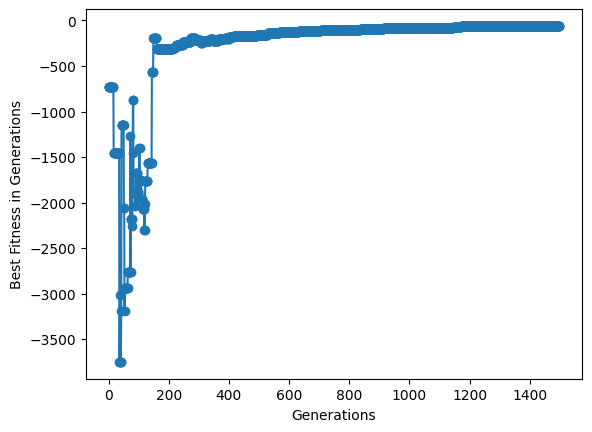

In [20]:
check()